# Lab 07: Object Dectection

Find an image online or use your own photo containing various objects. Write a Python script to load the YOLOv8 model and detect objects in the chosen image. Submit the image with the detected objects and the Python code.


## Install Yolo and OpenCV

In [1]:
!pip install ultralytics opencv-python pillow matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.6 MB/s eta 0:00:00


## Import Yolo and Loading Model

In [5]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Using lightweight model as this is mainly for demonstration purposes
model = YOLO("yolov8n.pt")

## Get input image

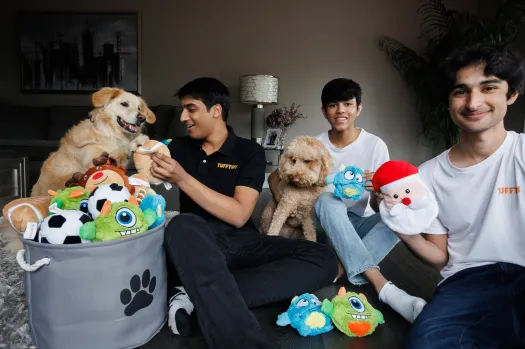

In [12]:
image_path = "test.webp"

# Read the image using OpenCV
image = cv2.imread(image_path)
cv2_imshow(image)

## Plug image to model and perform detection

In [16]:
# Run the YOLOv8 model on the image
results = model(image)


0: 448x640 5 persons, 2 dogs, 117.0ms
Speed: 3.4ms preprocess, 117.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


In [17]:
# Draw bounding boxes with labels and confidence scores.
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = result.names[int(box.cls[0])]
        conf = float(box.conf[0])

        # Draw a rectangle and label on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

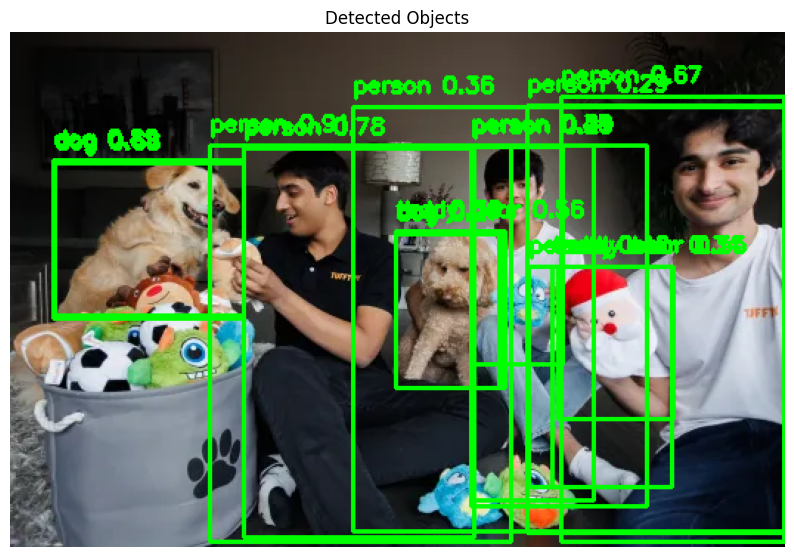

In [18]:
# Save the processed image with detections
output_path = "detected_objects.jpg"
cv2.imwrite(output_path, image)

# Convert BGR image (OpenCV default) to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Detected Objects")
plt.show()